# Using ANN for image classification
## Recall that the way neural net works is by learning some features from the input

![ann](assets/ann.jpeg)

## Can this architecture work on images ?

## The dataset we are going to use is hand written digits, and it's available in keras already !

In [11]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


## Let's take a look at the data

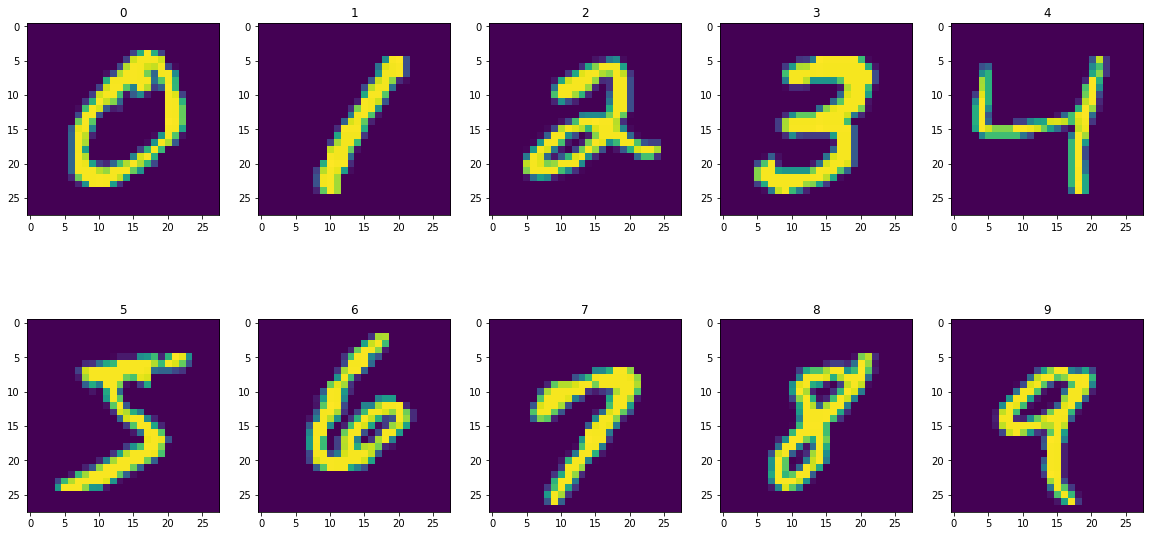

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for label in range(10):
    # get an image
    img = x_train[y_train==label][0]
    axes[label].imshow(img)
    axes[label].set_title(label)

In [13]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


## The X axis has no problem, but we need to reshape the Y into one hot encoded matrix

In [14]:
from keras.utils import to_categorical

# this function takes our one 1 vector and turns it into a one hot encoded matrix
labels = len(np.unique(y_train))

y_train = to_categorical(y_train, labels)
y_test = to_categorical(y_test, labels)

## Now we are ready, but let's take a look how the data looks like !

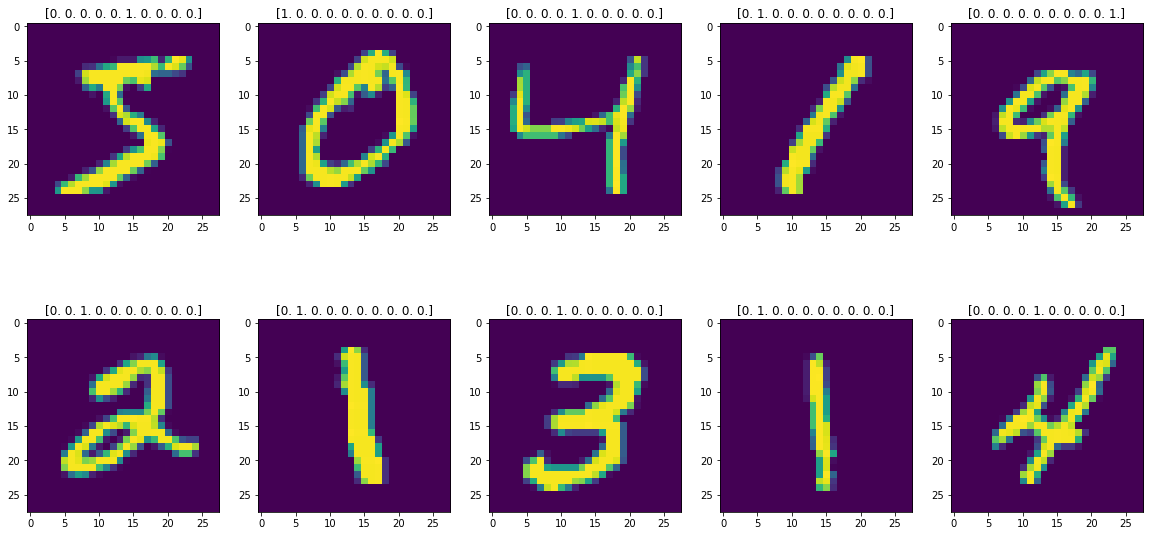

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i in range(10):
    # get an image
    img = x_train[i]
    label = y_train[i]
    axes[i].imshow(img)
    axes[i].set_title(label)

## Let's build the model

our model will consist of two hidden layers

### Note

the last layer must be a `softmax` activated as it has multiple labels  

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# lets define our model
clf = Sequential()
# add a flatten layer to flatten the input images 
# Recall that the MLP takes a flattened vector as input 
clf.add(Flatten(input_shape=x_train.shape[1:]))

# now to the fully connected layers
clf.add(Dense(512, activation='relu'))
clf.add(Dropout(0.2))
clf.add(Dense(512, activation='relu'))
clf.add(Dropout(0.2))

# the activiation layer now, with nodes equal to number of output labels
# dont forget to use softmax as activiation here
clf.add(Dense(10, activation='softmax'))
clf.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Time to train the model

In [21]:
history = clf.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 26us/step - loss: 8.4366 - acc: 0.4765 - val_loss: 8.4421 - val_acc: 0.4761
Epoch 2/50
48000/48000 [==============================] - 1s 25us/step - loss: 8.5127 - acc: 0.4718 - val_loss: 8.5637 - val_acc: 0.4685
Epoch 3/50
48000/48000 [==============================] - 1s 25us/step - loss: 8.4540 - acc: 0.4754 - val_loss: 8.4414 - val_acc: 0.4761
Epoch 4/50
48000/48000 [==============================] - 1s 25us/step - loss: 8.4357 - acc: 0.4765 - val_loss: 8.3570 - val_acc: 0.4815
Epoch 5/50
48000/48000 [==============================] - 1s 25us/step - loss: 8.4115 - acc: 0.4780 - val_loss: 8.3262 - val_acc: 0.4833
Epoch 6/50
48000/48000 [==============================] - 1s 26us/step - loss: 8.3776 - acc: 0.4801 - val_loss: 8.3580 - val_acc: 0.4813
Epoch 7/50
48000/48000 [==============================] - 1s 26us/step - loss: 8.4736 - acc: 0.4741 - val_loss: 8.6276 - val_acc

## Let's see the `acc` over epochs

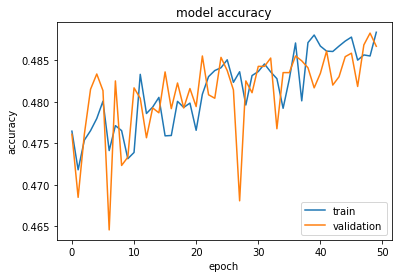

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

## And what about the `loss` ?

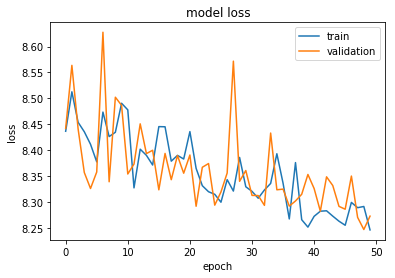

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Model evaluation

In [24]:
score = clf.evaluate(x_test, y_test, verbose=0)[1]
print("model accuracy on test set :",score*100)

model accuracy on test set : 48.66


## We can see that the model doesn't perform well, actually it can't for larger datasets.
## Can you guess why ?

## Look at this image 

![mlp-image1](assets/mlp_img1.png)

## and this one !

![mlp-image1](assets/mlp_img2.png)

## what do you think ?